In [23]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [52]:
diabetes_dataset = datasets.load_diabetes()
X = pd.DataFrame(diabetes_dataset.data, columns=diabetes_dataset.feature_names)
y = pd.DataFrame(diabetes_dataset.target, columns=["Disease Progression"])

In [69]:
#print(diabetes_dataset.DESCR)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


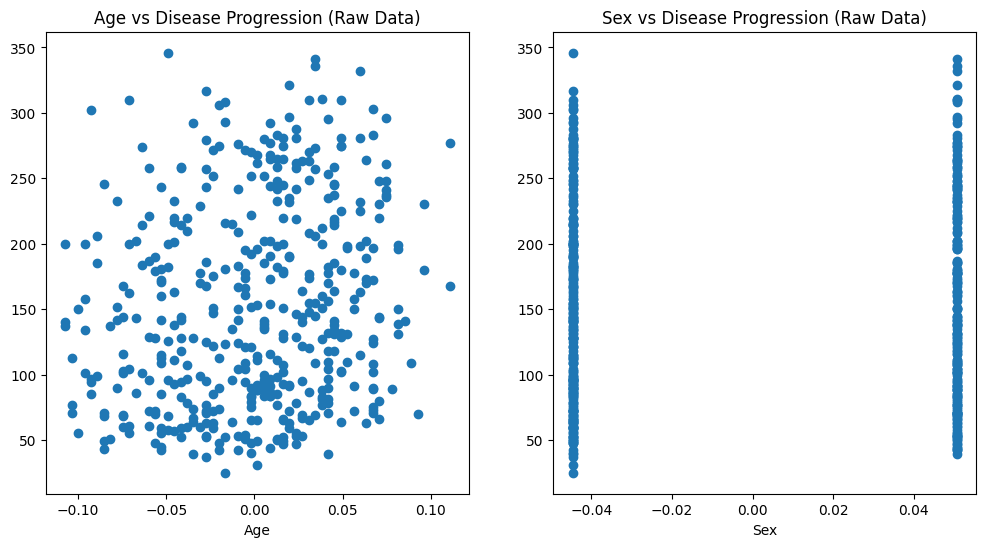

In [54]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], y)
plt.title('Age vs Disease Progression (Raw Data)')
plt.xlabel('Age')
plt.ylabel('')

plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 1], y)
plt.title('Sex vs Disease Progression (Raw Data)')
plt.xlabel('Sex')
plt.show()

In [55]:
# Preprocessing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
# Converting scaled features back to DataFrame for better readability
X_scaled = pd.DataFrame(X_scaled, columns=diabetes_dataset.feature_names)

In [57]:
# Printing the preprocessed data
X_scaled.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


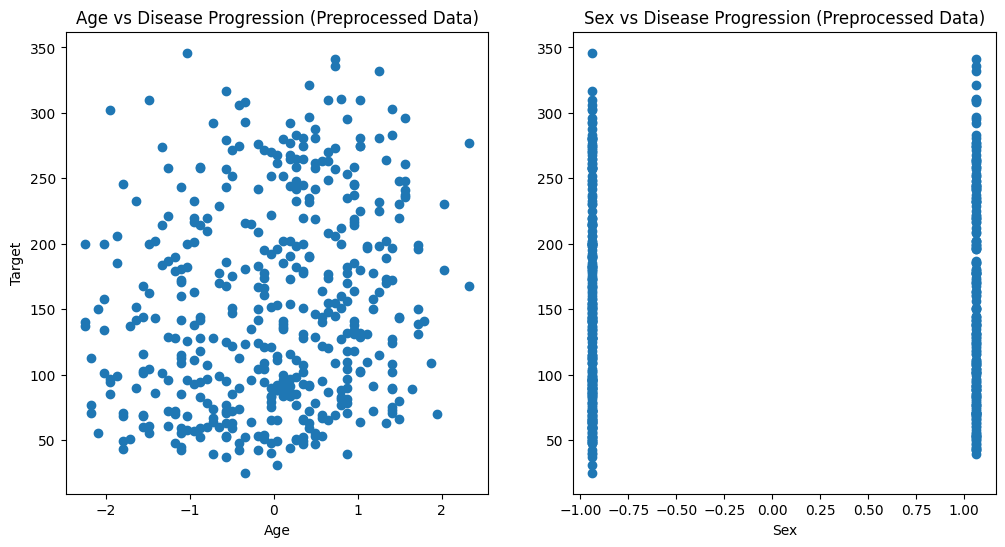

In [58]:
# Plotting the preprocessed data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled.iloc[:, 0], y)
plt.title('Age vs Disease Progression (Preprocessed Data)')
plt.xlabel('Age')
plt.ylabel('Target')

plt.subplot(1, 2, 2)
plt.scatter(X_scaled.iloc[:, 1], y)
plt.title('Sex vs Disease Progression (Preprocessed Data)')
plt.xlabel('Sex')
plt.show()

In [59]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

In [60]:
# Defining the models to be used
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest Regressor": RandomForestRegressor()
}

# Defining the parameters for GridSearchCV for each model
params = {
    "Linear Regression": {},
    "Ridge Regression": {"ridgeregression__alpha": [0.1, 1, 10]},  # Corrected here
    "Random Forest Regressor": {"randomforestregressor__n_estimators": [10, 50, 100]}
}

In [61]:
# Using KFold for a more advanced cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=32)

In [62]:
times = {}
scores = {}

for model_name, model in models.items():

    start_time = time.time()

    # Create a pipeline with scaling and the model
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        (model_name.lower().replace(" ", ""), model)
    ])

    # Grid search with cross-validation
    grid = GridSearchCV(pipeline, params[model_name], cv=kf, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train.values.ravel())

    end_time = time.time()
    elapsed_time = end_time - start_time

    # Predict and calculate mean squared error
    predictions = grid.predict(X_test)
    mse = mean_squared_error(y_test, predictions)

    # Storing results
    times[model_name] = elapsed_time
    scores[model_name] = -grid.best_score_

    # Print results for each model
    print(f"{model_name}:")
    print(f"Best Parameters: {grid.best_params_}")
    print(f"Mean Squared Error: {mse}")
    print(f"Time taken: {elapsed_time} seconds\n")

Linear Regression:
Best Parameters: {}
Mean Squared Error: 2787.643402443913
Time taken: 0.0259549617767334 seconds

Ridge Regression:
Best Parameters: {'ridgeregression__alpha': 10}
Mean Squared Error: 2787.5133483423933
Time taken: 0.06376433372497559 seconds

Random Forest Regressor:
Best Parameters: {'randomforestregressor__n_estimators': 100}
Mean Squared Error: 2943.8020471910113
Time taken: 4.083625078201294 seconds

